### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [79]:
data = pd.read_csv('data/coupons.csv')

In [80]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [81]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [82]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [83]:
# drop the car column as most of the values are null
data.drop('car', axis=1, inplace=True)

#replace the other null values with never 
data = data.fillna('never')

4. What proportion of the total observations chose to accept the coupon?



In [84]:
proportion = data['Y'].mean()
print(proportion)

0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

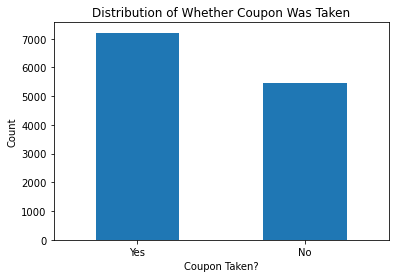

In [85]:
coupon_counts = data['Y'].value_counts()
coupon_counts.plot(kind='bar')
plt.title('Distribution of Whether Coupon Was Taken')
plt.xlabel('Coupon Taken?')
plt.ylabel('Count')
plt.xticks([0,1],['Yes','No'],rotation=0)
plt.savefig('images/coupon_distribution')
plt.show()


6. Use a histogram to visualize the temperature column.

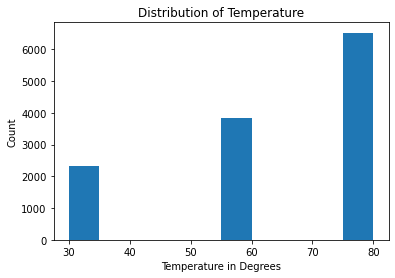

In [86]:
data['temperature'].plot(kind='hist')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature in Degrees')
plt.ylabel('Count')
plt.savefig('images/temperature_distribution')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [87]:
bar_coupons = data[data['coupon'] == 'Bar']
bar_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [88]:
proportion = bar_coupons['Y'].mean()
print(proportion)

0.41001487357461575


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [89]:
#bar_coupons['Bar'].value_counts()

more_times = bar_coupons[bar_coupons['Bar'].isin(['4~8','gt8'])]
fewer_times = bar_coupons[bar_coupons['Bar'].isin(['never','less1','1~3'])]

more_times_rate = more_times['Y'].mean()
fewer_times_rate = fewer_times['Y'].mean()

print("Proportion of people who went more than 3 times to the bar and accepted the coupon: "+ str(more_times_rate))

print("Proportion of people who went fewer than 3 times to the bar and accepted the coupon: "+ str(fewer_times_rate))


Proportion of people who went more than 3 times to the bar and accepted the coupon: 0.7688442211055276
Proportion of people who went fewer than 3 times to the bar and accepted the coupon: 0.37073707370737075


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [90]:
# bar_coupons['age'].value_counts()
indexes = (bar_coupons['Bar'] != 'never') & (bar_coupons['Bar'] != 'less1') & (bar_coupons['age'] != '21') & (bar_coupons['age'] != 'below21')
gt25 = bar_coupons[indexes]['Y'].mean()
other = bar_coupons[~indexes]['Y'].mean()


print("Proportion of people who went more than once to the bar and more than 25 yrs: "+ str(gt25))

print("Proportion of others: "+ str(other))


Proportion of people who went more than once to the bar and more than 25 yrs: 0.6952380952380952
Proportion of others: 0.33500313087038197


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [91]:
indexed = (bar_coupons['Bar'] != 'never') & (bar_coupons['Bar'] != 'less1') & (bar_coupons['passanger'] != 'Kid(s)') & ( bar_coupons['occupation'] != 'Farming Fishing & Forestry')
no_kid = bar_coupons[indexed]['Y'].mean()
others = bar_coupons[~indexed]['Y'].mean()


print("Proportion of people who went more than once to the bar, had no kids passenger, and didn't work in farming, fishing, or forestry: "+ str(no_kid))

print("Proportion of others: "+ str(others))

Proportion of people who went more than once to the bar, had no kids passenger, and didn't work in farming, fishing, or forestry: 0.7132486388384754
Proportion of others: 0.296043656207367


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [92]:
first_condition = (bar_coupons['Bar'] != 'never') & (bar_coupons['Bar'] != 'less1') & (bar_coupons['passanger'] != 'Kid(s)') & (bar_coupons['maritalStatus'] != 'Widowed')
second_condition = (bar_coupons['Bar'] != 'never') & (bar_coupons['Bar'] != 'less1') &  (bar_coupons['age'].isin(['21','below21','26']))
third_condition = (bar_coupons['RestaurantLessThan20'].isin(['4~8','gt8'])) & (bar_coupons['income'].isin(['$25000 - $37499','$12500 - $24999','$37500 - $49999','Less than $12500']))

first_data = bar_coupons[first_condition]['Y'].mean()
second_data = bar_coupons[second_condition]['Y'].mean()
third_data = bar_coupons[third_condition]['Y'].mean()

print("Proportion of people who go to bars more than once a month, had passengers that were not a kid, and were not widowed: " + str(first_data))
print("Proportion of people who go to bars more than once a month and are under the age of 30: " + str(second_data))
print("Proportion of people who go to cheap restaurants more than 4 times a month and income is less than 50K: " + str(third_data))


Proportion of people who go to bars more than once a month, had passengers that were not a kid, and were not widowed: 0.7132486388384754
Proportion of people who go to bars more than once a month and are under the age of 30: 0.7217391304347827
Proportion of people who go to cheap restaurants more than 4 times a month and income is less than 50K: 0.45348837209302323


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the analysis of bar coupons, several hypotheses can be formulated about the drivers who are more likely to accept these offers. Firstly, drivers who frequent bars more than three times a month tend to accept bar coupons more readily, likely due to the perceived value of the offer aligning with their regular social habits. Age also plays a role, with individuals over 25 showing a higher acceptance rate, possibly due to lifestyle preferences that include socializing at bars. The presence of children as passengers appears to deter acceptance, as drivers without children are more inclined to use bar coupons, likely because bars are not typically seen as family-friendly venues. Additionally, drivers with occupations outside of farming, fishing, or forestry are more likely to accept these coupons, suggesting a correlation between certain professions and social activities involving bars. Marital status also influences acceptance, with non-widowed individuals being more receptive to bar coupons, possibly due to more active social lives. Lastly, drivers with moderate to high incomes might be more inclined to use bar coupons, as they have the disposable income to engage in social activities. Understanding these patterns can help businesses tailor their marketing strategies to target the most receptive audiences, thereby enhancing the effectiveness of their coupon campaigns.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [93]:
# I chose the coffee coupons as coffee is an integral part of our lives

coffee_coupons = data[data['coupon'] == 'Coffee House']
coffee_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,0,0,0,1,0


In [94]:
#overall proportion
coffee_proportion = coffee_coupons['Y'].mean()
print(coffee_proportion)

0.49924924924924924


### Plot Analysis

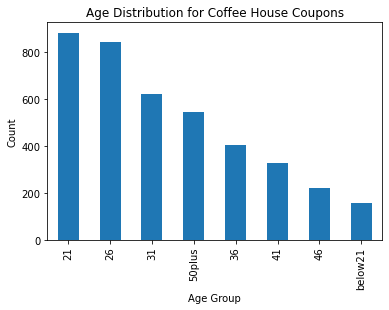

In [95]:
coffee_coupons['age'].value_counts().plot(kind='bar')
plt.title('Age Distribution for Coffee House Coupons')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.savefig('images/coffee_coupon_age_dist')
plt.show()

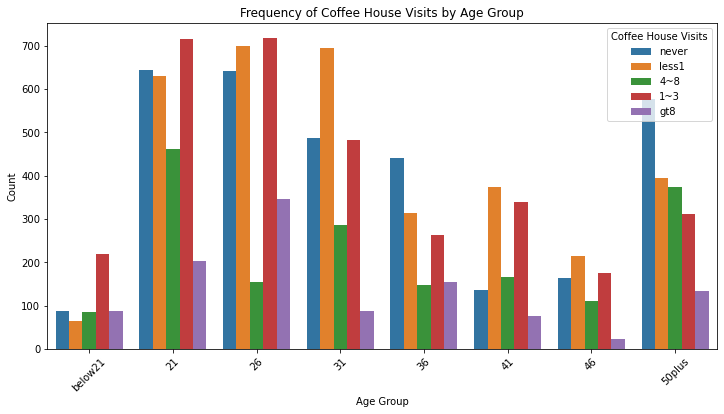

In [96]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='age', hue='CoffeeHouse', order=['below21', '21', '26', '31', '36', '41', '46', '50plus'])
plt.title('Frequency of Coffee House Visits by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Coffee House Visits', loc='upper right')
plt.xticks(rotation=45)
plt.savefig('images/coffee_house_visits_by_age')
plt.show()

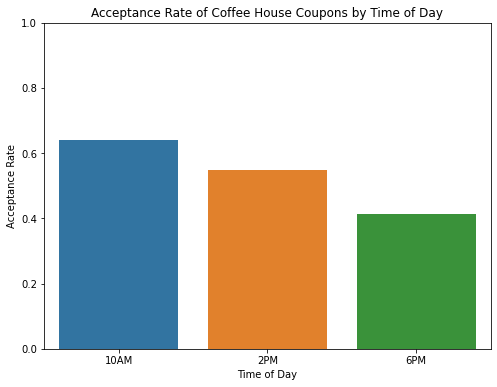

In [97]:
time_acceptance = coffee_coupons.groupby('time')['Y'].mean().reset_index()

# Create a bar plot for time of day and acceptance of coupon
plt.figure(figsize=(8, 6))
sns.barplot(x='time', y='Y', data=time_acceptance, order=['10AM', '2PM', '6PM'])
plt.title('Acceptance Rate of Coffee House Coupons by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.savefig('images/acceptance_wrt_time')
plt.show()

### Proportion analysis with different variables

In [98]:

indices = (coffee_coupons['CoffeeHouse'].isin(['4~8', 'gt8'])) & (coffee_coupons['age'].isin(['21', '26']))
print("Proportion of Frequent Coffee Visitors & Age 21-30: " + str(coffee_coupons[indices]['Y'].mean()))


Proportion of Frequent Coffee Visitors & Age 21-30: 0.6666666666666666


In [99]:
indices = (coffee_coupons['passanger'] != 'Kid(s)') & (coffee_coupons['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])) 
print("Proportion of People with No Kids & Income < $50K: " + str(coffee_coupons[indices]['Y'].mean()))


Proportion of People with No Kids & Income < $50K: 0.52392578125


In [100]:
indices = (coffee_coupons['maritalStatus'] == 'Single') & (coffee_coupons['CoffeeHouse'].isin(['4~8', 'gt8'])) 
print("Proportion of Single & Frequent Coffee Visitors: " + str(coffee_coupons[indices]['Y'].mean()))

Proportion of Single & Frequent Coffee Visitors: 0.6747967479674797


In [101]:
indices = (coffee_coupons['maritalStatus'] == 'Married partner') & (coffee_coupons['income'].isin(['$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More']))
print("Proportion of Married & High Income Individuals: " + str(coffee_coupons[indices]['Y'].mean()))


Proportion of Married & High Income Individuals: 0.4975845410628019


In [102]:
indices = (coffee_coupons['age'].isin(['21', '26'])) & (coffee_coupons['destination'] == 'No Urgent Place')
print("Proportion of Young Adults With No Urgent Destination: " + str(coffee_coupons[indices]['Y'].mean()))



Proportion of Young Adults With No Urgent Destination: 0.6103336921420882


In [103]:
indices =  (coffee_coupons['CoffeeHouse'].isin(['4~8', 'gt8'])) & (coffee_coupons['weather'] == 'Sunny')
print("Proportion of Frequent Coffee Visitors with Sunny Weather: " + str(coffee_coupons[indices]['Y'].mean()))



Proportion of Frequent Coffee Visitors with Sunny Weather: 0.6951871657754011


In [105]:
indices =  (coffee_coupons['temperature'] == 80) & (coffee_coupons['CoffeeHouse'].isin(['4~8', 'gt8'])) 
print("Proportion of High Temperature & Frequent Coffee Visitors: " + str(coffee_coupons[indices]['Y'].mean()))



Proportion of High Temperature & Frequent Coffee Visitors: 0.734375
